
Classification of 1-D data and Bayes Error

## HW1 P6: Classification of 1-D data and Bayes Error

Suppose we have two populations of beans. The weights of these beans are normally distributed, so if $\mu$ is the mean weight of one type of beans beans and $\sigma$ is the standard deviation, so that means that the probabilty density is given by
    
$p_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2\sigma}(x-\mu)^2}$

and then the probability of measuring a weight in interval $I=[x_1,x_2]$ of bean of that type is given by

$P_{\mu,\sigma}(I) = \int_{x_1}^{x_2} p_{\mu,\sigma}(x) dx$

The mean weight of bean type A, $\mu_A$ is 5 grams and the standard deviation, $\sigma_A$, is 2. The mean weight of bean type B, $mu_B$, is 4 grams and has a standard deviation $\sigma_B$, of  1.4.

Our classifier $C_T(x)$ is determined by a weight threshold $T$:

$f\_T(x) = -1 \mbox{ if } x \leq T $

$f\_T(x) = 1  \mbox{ if } T < x  .$

The [*Bayes error*](https://en.wikipedia.org/wiki/Bayes_error_rate) is the probability that we will misclassify. Assume  that there are equally many beans of each type (no prior).

a. For a given T write down the theoretical expression (in terms of integrals) for the probability that you will classify a point as bean type A when it is bean type B and similarly that it is bean type B when it is bean type A.


b. In python just using numerical functions (you can take 1000 data points from min of weight x=1 to x=8) compute the theoretical probabilities from part a. Use matplotlib to make a curves showing the probability of classifying something class A ($\hat{C}=A$ )assuming it is really class B $C=B$, in other words $P(\hat{C}=A| C=B)$ is the figure y-axis, as a function of $T$, the figure x-axis. Similarly plot $P(\hat{C}=B| C=A)$ as a function of $T$. Putting these together since $P(A)=P(B)=1/2$, adding the curves and dividing by 2 you get the probability of miss-classification or Bayes error as a function of $T$. Plot that as well.


c. Use the numpy random.randn to simulate 10000 data points, 5,000 from bean type A and 5,000 from bean type B. You can now pick 1000 values of $T$ using linspace between $T=1$ and $T=8$. For each of these you can compute the miss classification rate. Make the figure. These should match closely your results for $b$ above.


# Solution:

## Part a



Based on the classification rule $f_T(x)$ based on a threshold $T$, the Bayes error consists two types of misclassification probabilities:

1. The probability of classifying a bean as type A ($f_T(x) = 1$) when it is actually of type B. This happens when the weight $x$ of a bean type B is greater than $T$. The probability density function for bean type B is $p_{\mu_B,\sigma_B}(x)$. Thus, the probability of this type of misclassification is the integral of $p_{\mu_B,\sigma_B}(x)$ over the interval $(T, \infty)$, reflecting the range of weights where this misclassification occurs.

2. The probability of classifying a bean as type B ($f_T(x) = -1$) when it is actually of type A. This happens when the weight $x$ of a bean type A is less than or equal to $T$. The probability density function for bean type A is $p_{\mu_A,\sigma_A}(x)$. Thus, the probability of this type of misclassification is the integral of $p_{\mu_A,\sigma_A}(x)$ over the interval $(-\infty, T]$, reflecting the range of weights where this misclassification occurs.

Based on $p_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$, the theoretical expressions for these probabilities are as follows:

1. **Probability of classifying a type B bean as type A** ($f_T(x) = 1$ for $x > T$ when it's actually B):
   $$P_{\text{misclassify B as A}} = \int_{T}^{\infty} p_{\mu_B,\sigma_B}(x) dx$$
   Substituting $p_{\mu_B,\sigma_B}(x)$ gives:
   $$P_{\text{misclassify B as A}} = \int_{T}^{\infty} \frac{1}{\sigma_B \sqrt{2\pi}} e^{-\frac{1}{2\sigma_B^2}(x-\mu_B)^2} dx$$

2. **Probability of classifying a type A bean as type B** ($f_T(x) = -1$ for $x \leq T$ when it's actually A):
   $$P_{\text{misclassify A as B}} = \int_{-\infty}^{T} p_{\mu_A,\sigma_A}(x) dx$$
   Substituting $p_{\mu_A,\sigma_A}(x)$ gives:
   $$P_{\text{misclassify A as B}} = \int_{-\infty}^{T} \frac{1}{\sigma_A \sqrt{2\pi}} e^{-\frac{1}{2\sigma_A^2}(x-\mu_A)^2} dx$$

These integrals represent the areas under the respective sections of the normal distribution curves for bean types A and B, indicating the probabilities of misclassification given a threshold $T$.


## Part b:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [16]:
# Define the parameters for the two types of beans
mu_A = 5
sigma_A = 2
mu_B = 4
sigma_B = 1.4

In [17]:
# Define the weight threshold range
T_range = np.linspace(1, 8, 1000)

In [18]:
# Compute the theoretical probabilities for misclassification
# Probability of classifying as A given it's B
P_A_given_B = [1 - norm.cdf(T, mu_B, sigma_B) for T in T_range]
# Probability of classifying as B given it's A
P_B_given_A = [norm.cdf(T, mu_A, sigma_A) for T in T_range]

In [19]:
# Compute the Bayes error as a function of T
Bayes_error = [(p_A_given_B + p_B_given_A) / 2 for p_A_given_B, p_B_given_A in zip(P_A_given_B, P_B_given_A)]


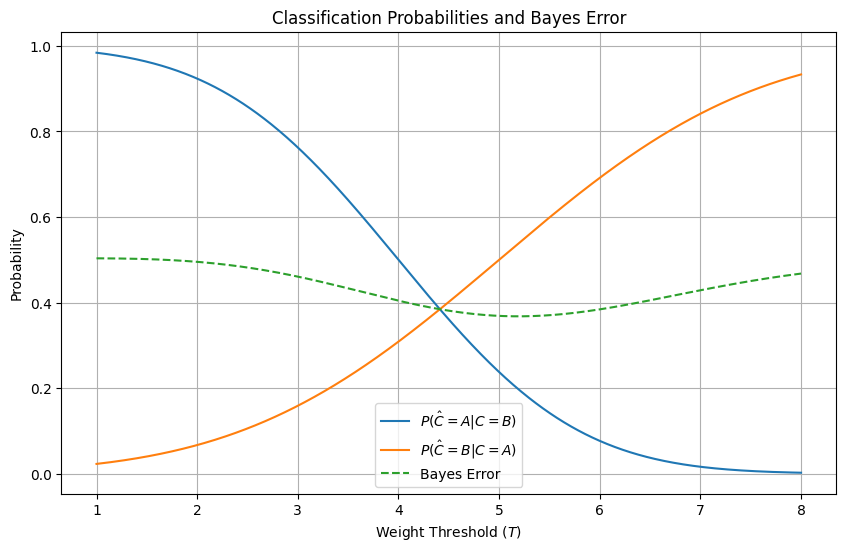

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_range, P_A_given_B, label='$P(\\hat{C}=A|C=B)$')
plt.plot(T_range, P_B_given_A, label='$P(\\hat{C}=B|C=A)$')
plt.plot(T_range, Bayes_error, label='Bayes Error', linestyle='--')
plt.xlabel('Weight Threshold ($T$)')
plt.ylabel('Probability')
plt.title('Classification Probabilities and Bayes Error')
plt.legend()
plt.grid(True)
plt.show()

The plot above displays the probabilities of misclassification as a function of the weight threshold \(T\). Each curve represnts the following:

- \(P(\hat{C}=A|C=B)\) represents the probability of classifying a bean as type A when it is actually type B, plotted across varying thresholds \(T\).
- \(P(\hat{C}=B|C=A)\) shows the probability of classifying a bean as type B when it is indeed type A, also across different \(T\) values.
- The Bayes error, illustrated with a dashed line, is the overall probability of misclassification regardless of the bean type. This error is computed by averaging the probabilities of misclassifying A as B and B as A, across all thresholds.

As the threshold \(T\) changes, these curves illustrate how the likelihood of misclassification for each bean type shifts, providing insight into how the choice of \(T\) impacts classification accuracy and the overall Bayes error in this context.


## Part c : 

In [21]:
# Constants
mu_A_1 = 5
sigma_A_1 = 2
mu_B_1 = 4
sigma_B_1 = 1.4
n_samples = 5000
n_T_values = 1000
T_min = 1
T_max = 8

In [22]:
#Data generation
data_A = np.random.randn(n_samples) * sigma_A + mu_A
data_B = np.random.randn(n_samples) * sigma_B + mu_B

In [23]:
#thresholds
T_values = np.linspace(T_min, T_max, n_T_values)

In [24]:
# Initialize misclassification rate array
misclassification_rates = np.zeros(n_T_values)

In [25]:
# Compute misclassification rate for each threshold
for i, T in enumerate(T_values):
    false_negatives = np.sum(data_A <= T) / n_samples # Type A misclassified as B
    false_positives = np.sum(data_B > T) / n_samples # Type B misclassified as A
    misclassification_rates[i] = (false_negatives + false_positives) / 2

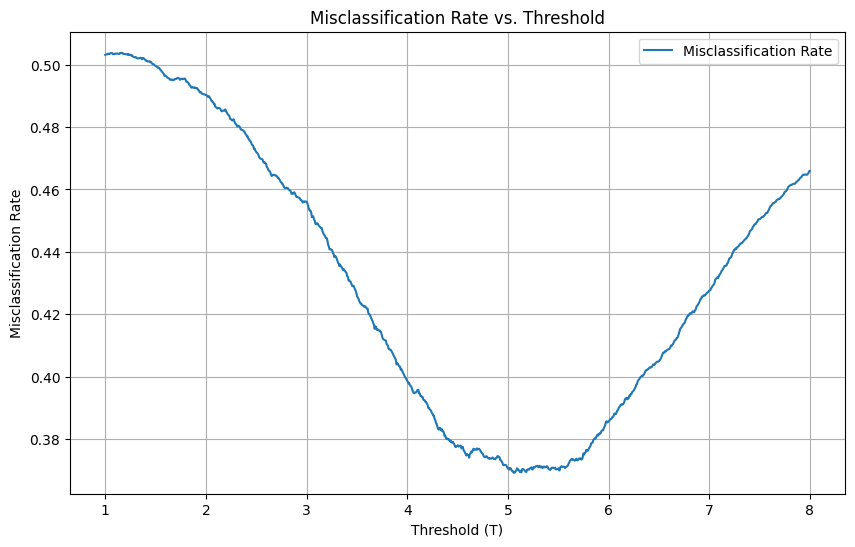

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_values, misclassification_rates, label="Misclassification Rate")
plt.xlabel("Threshold (T)")
plt.ylabel("Misclassification Rate")
plt.title("Misclassification Rate vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()

The figure above displays the misclassification rate as a function of the weight threshold \(T\), ranging from 1 to 8 grams, based on 10,000 simulated data points—5,000 from bean type A and 5,000 from bean type B. As the threshold \(T\) varies, the misclassification rate changes, highlighting how the choice of \(T\) affects the classifier's ability to distinguish between the two bean types. This simulation provides a practical insight into how the theoretical considerations translate into real-world classification performance.